In [77]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import random
import json
import requests

from config import api_key


# Create a reference the CSV file desired
csv_path = "2017_peak_hours_report_kdfactor.csv"
'''PEAK HOUR VOLUME DATA Peak hour volume data consists of hourly volume relationships and data location. The hourly volumes are expressed as a percentage of the Annual Average Daily Traffic (AADT). The percentages are shown for both the AM and the PM peak periods. The principle data described here are the K factor, the D factor and their product (KD). The K factor is the percentage of AADT during the peak hour for both directions of travel. The D factor is the percentage of the peak hour travel in the peak direction. KD multiplied with the AADT gives the one way peak period directional flow rate or the design hourly volume (DHV). The design hourly volume is used for either Operational Analysis or Design Analysis. Refer to the 2016 Highway Capacity Manual, 6th Edition A Guide for Multimodal Mobility Analysis for more details.'''

# Read the CSV into a Pandas DataFrame
aadt_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
aadt_df.head()

,Year,District,Route,County,Postmile,Descriptn,Back_pk_h,Back_pk_m,Back_AADT,Ahead_pk_h,Ahead_pk_m,Ahead_AADT,Lat_S_or_W,Lon_S_or_W,Lat_N_or_E,Lon_N_or_E
0,2017,12,1,ORA,R0.129,"DANA POINT, JCT. RTE. 5",0,0,0,3800,41000,37750,33.467008,-117.669809,33.467078,-117.669952
1,2017,12,1,ORA,R0.78,"DANA POINT, DOHENY PARK ROAD",3800,41000,37750,3900,42000,38800,33.464080,-117.678915,33.464173,-117.678870
2,2017,12,1,ORA,R1.077,BREAK IN ROUTE,0,0,0,0,0,0,33.464159,-117.683985,33.464251,-117.683978
3,2017,12,1,ORA,8.43,"LAGUNA BEACH, MOUNTAIN ROAD",2900,39500,36800,2900,39500,36800,33.531702,-117.774805,33.531709,-117.774814
4,2017,12,1,ORA,9.418,"LAGUNA BEACH, JCT. RTE. 133 NORTH",3050,41000,38500,3450,41000,38500,33.542738,-117.785319,33.542738,-117.785319


In [78]:
aadt_df.shape

(28093, 16)

In [79]:
# Check to see if there are any rows with missing data
aadt_df.dropna(how='any')  # clean up null values
aadt_df.count()

Year          28093
District      28093
Route         28093
County        28093
Postmile      28093
Descriptn     28093
Back_pk_h     28093
Back_pk_m     28093
Back_AADT     28093
Ahead_pk_h    28093
Ahead_pk_m    28093
Ahead_AADT    28093
Lat_S_or_W    28093
Lon_S_or_W    28093
Lat_N_or_E    28093
Lon_N_or_E    28093
dtype: int64

In [80]:
# Collect a list of traffic locations in CA
columns = [
"Year", 
"District",   # Caltrans has twelve transportation districts statewide. This abbreviation identifies the district in which the count station is located. 
"Route",   # The state highway route number. 
"County",  # County abbreviation used by Caltrans
"Postmile", # The Post Mile is the mileage measured from the county line, or from the beginning of a route. Each postmile along a route in a county is a unique location on the state highway system. 
"Descriptn", # description for segment
"Back_AADT", # Annual Average Daily Traffic (24hr - reverse commute)
"Ahead_AADT", # Annual Average Daily Traffic (24hr - peak commute)
"Lat_S_or_W", # NAD83 latitude for end node 
"Lon_S_or_W",  # NAD83 longitude for end node
"Lat_N_or_E",  # NAD83 longitude for start node
"Lon_N_or_E"  # NAD83 longitude for start node
]

In [81]:
# Create a group based on the routes and mile post in California
aadt_group = aadt_df.groupby(['County', 'Route','Postmile','Year'])

# look at count per location
print(f"aadt_group.count={aadt_group.count()}")

# Count how many times each location appears in our group

aadt_group.count=                            District  Descriptn  Back_pk_h  Back_pk_m  \
County Route Postmile Year                                              
ALA    112   0.602    2014         1          1          1          1   
                      2015         1          1          1          1   
                      2016         1          1          1          1   
                      2017         1          1          1          1   
             1.507    2014         1          1          1          1   
                      2015         1          1          1          1   
                      2016         1          1          1          1   
                      2017         1          1          1          1   
             1.782    2014         1          1          1          1   
                      2015         1          1          1          1   
                      2016         1          1          1          1   
                      2017        

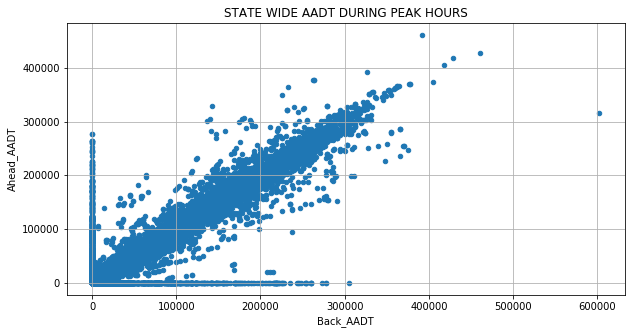

In [82]:
# Create a scatter plot which compares PM PHV  to AM PHV for all highways
aadt_df.plot(kind="scatter", x="Back_AADT", y="Ahead_AADT", grid=True, figsize=(10,5),
              title="STATE WIDE AADT DURING PEAK HOURS")
plt.show()
# 28000 records of AADT with route and mile 
# Plot indicates head and back commute have same AADT. 

In [83]:
#create summary 
County_sum = (aadt_df.groupby("County")["Ahead_AADT"].count())
AM_max = (aadt_df.groupby("County")["Ahead_AADT"].max())
AM_avg = (aadt_df.groupby("County")["Ahead_AADT"].mean())
AM_min = (aadt_df.groupby("County")["Ahead_AADT"].min())
ca_df = pd.DataFrame({'AM max AADT': AM_max, 'AM avg AADT': AM_avg, 'AM min AADT': AM_min })
ca_df.head()

,AM max AADT,AM avg AADT,AM min AADT
County,,,
ALA,293000,81506.010363,0
ALP,3550,1325.921053,0
AMA,20900,6160.638298,0
BUT,88000,15321.051345,0
CAL,15900,4945.850000,0


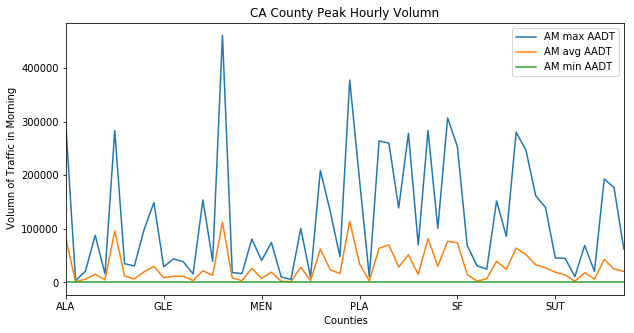

<Figure size 432x288 with 0 Axes>

In [84]:
# Set x axis and tick locations
x_axis = np.arange(len(aadt_df))
tick_locations = [value for value in x_axis]

# Plot Data 
ca_df.plot(kind="line", figsize=(10,5))

# Set a title for the chart
plt.title("CA County Peak Hourly Volumn")
plt.xlabel(" Counties")
plt.ylabel(" Volumn of Traffic in Morning")

#Add the legend.
legend = plt.legend(loc = "best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.show()
plt.tight_layout()

In [ ]:
####################EXTRACT WEATHER DATA#####################################

In [51]:
# Save config informationfor open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
city1 = "San Francisco"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city1

In [52]:
# Get weather data for SF from OPEN WEATHER API
weather_response = requests.get(query_url)
weather_json = weather_response.json()

#Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -76.88, 'lat': 1.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.626, 'pressure': 1019.09, 'humidity': 89, 'temp_min': 282.626, 'temp_max': 282.626, 'sea_level': 1019.09, 'grnd_level': 759}, 'wind': {'speed': 0.82, 'deg': 240.429}, 'clouds': {'all': 100}, 'dt': 1565316330, 'sys': {'message': 0.0074, 'country': 'CO', 'sunrise': 1565262504, 'sunset': 1565306282}, 'timezone': -18000, 'id': 3669881, 'name': 'San Francisco', 'cod': 200}.


In [53]:
# Print the output of the JSON
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 1.17,
        "lon": -76.88
    },
    "dt": 1565316330,
    "id": 3669881,
    "main": {
        "grnd_level": 759,
        "humidity": 89,
        "pressure": 1019.09,
        "sea_level": 1019.09,
        "temp": 282.626,
        "temp_max": 282.626,
        "temp_min": 282.626
    },
    "name": "San Francisco",
    "sys": {
        "country": "CO",
        "message": 0.0074,
        "sunrise": 1565262504,
        "sunset": 1565306282
    },
    "timezone": -18000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240.429,
        "speed": 0.82
    }
}


In [ ]:
######################################EXTRACT SF LOCAL STREETS DATA##########################################

In [ ]:
# Street_Pavement_Condition Legend
# Field Name Data / Type / Definition Notes (optional)
#   "CNN"           Number    CNN of street segment or intersection location
# "STREET"          Text / VarChar      Street name
# "PCI_Score"       Number    Paving Condition Index Score
# "From_Street"     Text      Cross street 1
# "To_Street"       Text      Cross street 2
# "PCI_Change_Date" Date      Date condition score last updated
# Street_Accepted_For_Maintenance     Yes/No      Street accepted for maintenance by Public Works
# "Functional_Class" Text
# The functional class of the street segment:
# Arterial, Collector or Residential.

In [ ]:
# Column Name      Description                 Type
#   "CNN"   unique street centerline ID       Number
# "STREET"  street name                       Plain Text / VarChar
# "ST_TYPE" street type                       Plain Text
# "NHOOD"   neighborhood the street segment is in / Plain Text  
# "CNNTEXT" CNN as a text field              Plain Text              
# "shape"                                    Line-String

In [57]:
# Extract CSVs into DataFrames

In [58]:
# Extract Street_Pavement_Condition.csv into DataFrames (City Infrastructure)
SPC_file = "Street_Conditions_2017.csv"
Street_Condition_df = pd.read_csv(SPC_file)
Street_Condition_df.head(10)

,CNN,STREET,PCI_Score,From_Street,To_Street,PCI_Change_Date,Treatment_or_Survey,Street_Accepted_For_Maintenance,Functional_Class
0,8321000,Liberty St,100,Valencia St,Guerrero St,12/28/17,Treatment,Yes,Residential
1,33124000,HUMBOLDT ST,100,VERMONT ST,Intersection,12/27/17,Treatment,No,NaN
2,51760000,Bay Shore Blvd On Ramp: Hwy 101 S On Ramp \ Po...,100,HWY 101 S ON RAMP \ POTRERO AVE,Intersection,12/27/17,Treatment,No,NaN
3,13219000,Vermont St,100,22nd St,Humboldt St,12/27/17,Treatment,Yes,Residential
4,13220000,Vermont St,100,Humboldt St,23rd St,12/27/17,Treatment,Yes,Residential
5,8436000,Lombard St,100,Child St,Julius St,12/18/17,Treatment,Yes,Residential
6,11583000,Santa Paula Ave,100,Santa Monica Way,Terrace Walk \ Yerba Buena Ave,12/18/17,Treatment,Yes,Residential
7,13524002,Webster St,100,Rose St,Page St,12/18/17,Treatment,Yes,Arterial
8,11582000,Santa Paula Ave,100,Portola Dr,Santa Monica Way,12/18/17,Treatment,Yes,Residential
9,13524001,Webster St,100,Haight St,Rose St,12/18/17,Treatment,Yes,Arterial


In [59]:
# Extract Rush_Hour_Routes.csv into Dataframes
RH_file = "Rush_Hour_Routes.csv"
Rush_Hour_Routes_df = pd.read_csv(RH_file)
Rush_Hour_Routes_df.head(10)

,CNN,Street_name,ST_TYPE,NHOOD,CNNTEXT,shape
0,164000,03RD,ST,Financial District South,164000,LINESTRING (-122.40302819316682 37.78702441841...
1,171000,03RD,ST,Financial District South,171000,LINESTRING (-122.39794293881961 37.78299789708...
2,170000,03RD,ST,Financial District South,170000,LINESTRING (-122.39893033171637 37.78378493342...
3,174000,03RD,ST,Financial District South,174000,LINESTRING (-122.39637951941779 37.78175028392...
4,168000,03RD,ST,Financial District South,168000,LINESTRING (-122.40046848439732 37.78503028445...
5,175000,03RD,ST,Financial District South,175000,LINESTRING (-122.39584349887906 37.78132125731...
6,172000,03RD,ST,Financial District South,172000,LINESTRING (-122.39738553904088 37.78255359330...
7,173000,03RD,ST,Financial District South,173000,LINESTRING (-122.39684142722312 37.78211912139...
8,169000,03RD,ST,Financial District South,169000,LINESTRING (-122.3994598243438 37.784213640305...
9,166000,03RD,ST,Financial District South,166000,LINESTRING (-122.40202541968891 37.78624815175...


In [60]:
####################################  Transform Street_Condition_df DataFrame################################### 

In [61]:
# Create a filtered dataframe from specific columns
SPC_cols = ["STREET","CNN","Street_Accepted_For_Maintenance"]
SPC_transformed = Street_Condition_df[SPC_cols].copy()

# Rename the column headers
SPC_transformed = SPC_transformed.rename(columns={"STREET":"Street",
                                                  "CNN":"Cnn",
                                                  "Street_Accepted_For_Maintenance":"Street_Maintenance"})

# Clean the data by dropping duplicates and setting the index
SPC_transformed.drop_duplicates("Cnn", inplace=True)
SPC_transformed.set_index("Cnn", inplace=True)

SPC_transformed.head()

,Street,Street_Maintenance
Cnn,,
8321000,Liberty St,Yes
33124000,HUMBOLDT ST,No
51760000,Bay Shore Blvd On Ramp: Hwy 101 S On Ramp \ Po...,No
13219000,Vermont St,Yes
13220000,Vermont St,Yes


In [62]:
################################### Transform Rush_Hour_Routes_df Dataframe################################### 

In [63]:
# Create a filtered dataframe from specific columns
RH_Routes_cols = ["Street_name","CNN", "NHOOD"]
RH_Routes_transformed = Rush_Hour_Routes_df[RH_Routes_cols].copy()

# Rename the column headers
RH_Routes_transformed = RH_Routes_transformed.rename(columns={"Street_name":"Street",
                                               "CNN":"Cnn",
                                               "NHOOD":"Neighborhood"}) 
# Set Index
RH_Routes_transformed.set_index("Cnn", inplace=True)
RH_Routes_transformed.head()

,Street,Neighborhood
Cnn,,
164000,03RD,Financial District South
171000,03RD,Financial District South
170000,03RD,Financial District South
174000,03RD,Financial District South
168000,03RD,Financial District South


In [64]:
# Create database , table schema , queries via PostgresSQL / Create Database connection 

In [65]:
connection_string = "postgres:Logan215@localhost:5432/Traffic_db"
engine = create_engine(f'postgresql://{connection_string}')

In [66]:
# Confirm tables (Street_Condition) & (Rush_Hour)
engine.table_names()

['Street_Condition',
 'Rush_Hour_Routes',
 'Street_Condition1',
 'Rush_Hour_Routes1']

In [70]:
# Load DataFrames into PostgresSQL database

In [71]:
SPC_transformed.to_sql(name='Street_Condition1', con=engine, if_exists='append', index=True)

In [72]:
RH_Routes_transformed.to_sql(name='Rush_Hour_Routes1', con=engine, if_exists='append', index=True)